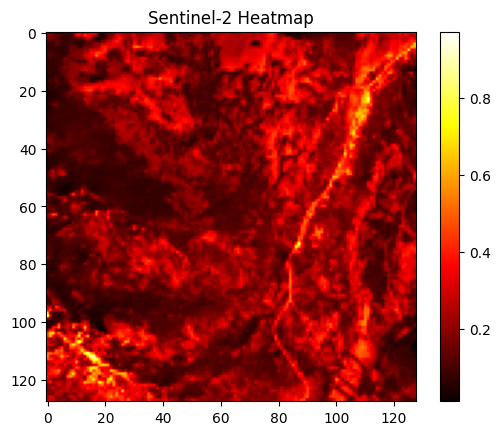

In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
with rasterio.open('data/images/101.tif') as src:
    band4 = src.read(4)  # Red band
    band3 = src.read(3)  # Green band
    band2 = src.read(2)  # Blue band

# Normalize the data
normalized_band4 = (band4 - np.min(band4)) / (np.max(band4) - np.min(band4))
normalized_band3 = (band3 - np.min(band3)) / (np.max(band3) - np.min(band3))
normalized_band2 = (band2 - np.min(band2)) / (np.max(band2) - np.min(band2))

# Create heatmap
heatmap = (normalized_band4 + normalized_band3 + normalized_band2) / 3

# Display the heatmap
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.title('Sentinel-2 Heatmap')
plt.show()

Min pixel value: 104, Max pixel value: 572


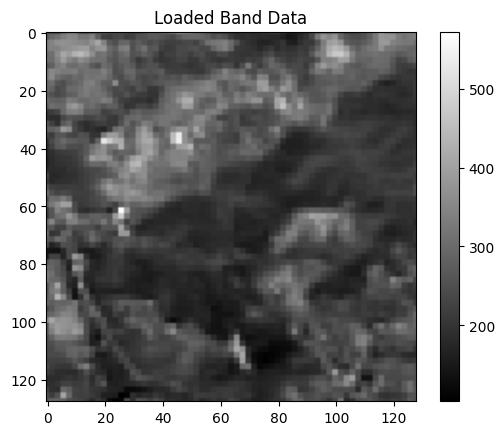

In [5]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
file_path = 'data/images/1.tif'  # Update this path to your actual image file

# Open the image and check pixel values
with rasterio.open(file_path) as src:
    band_data = src.read(1)  # Read the first band
    print(f'Min pixel value: {np.min(band_data)}, Max pixel value: {np.max(band_data)}')

# Visualize the band
plt.imshow(band_data, cmap='gray')
plt.colorbar()
plt.title('Loaded Band Data')
plt.show()

Band 2 Min: -28, Max: 846
Band 3 Min: -2, Max: 1099
Band 4 Min: 2, Max: 1297
Band 8 Min: 64, Max: 160
Band 11 Min: 10, Max: 90


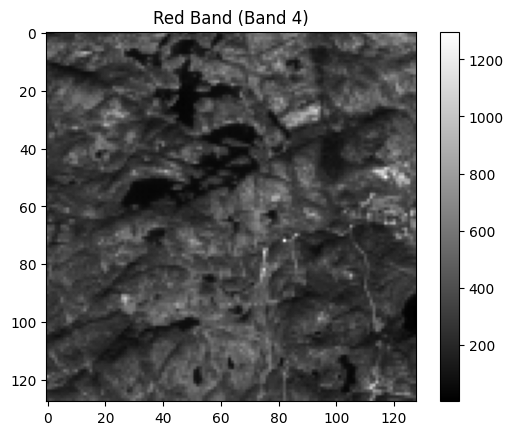

In [32]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
file_path = 'data/images/0.tif'  # Update this path to your actual image file

# Open the multi-band image
with rasterio.open(file_path) as src:
    band2 = src.read(2)  # Blue band
    band3 = src.read(3)  # Green band
    band4 = src.read(4)  # Red band
    band8 = src.read(8)  # NIR band
    band11 = src.read(11)  # SWIR1 band

# Check the pixel values
print(f"Band 2 Min: {np.min(band2)}, Max: {np.max(band2)}")
print(f"Band 3 Min: {np.min(band3)}, Max: {np.max(band3)}")
print(f"Band 4 Min: {np.min(band4)}, Max: {np.max(band4)}")
print(f"Band 8 Min: {np.min(band8)}, Max: {np.max(band8)}")
print(f"Band 11 Min: {np.min(band11)}, Max: {np.max(band11)}")

# Visualize one of the bands
plt.imshow(band4, cmap='gray')
plt.colorbar()
plt.title('Red Band (Band 4)')
plt.show()

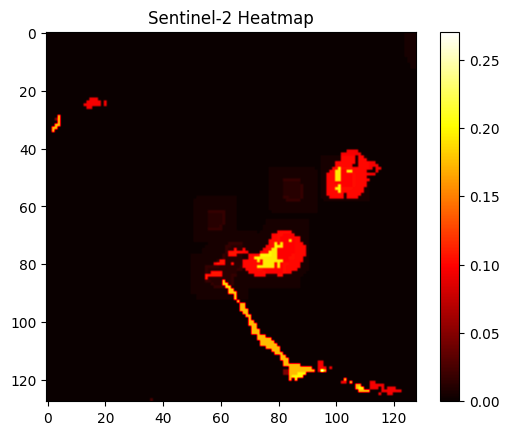

In [14]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
with rasterio.open('data/images/105.tif') as src:
    band2 = src.read(2)  # Blue band
    band3 = src.read(3)  # Green band
    band4 = src.read(4)  # Red band
    band8 = src.read(8)  # NIR band   -->detect Water
    band11 = src.read(11)  # SWIR1 band --. Detect water 


# Normalize the data
normalized_band4 = (band4 - np.min(band4)) / (np.max(band4) - np.min(band4))
normalized_band3 = (band3 - np.min(band3)) / (np.max(band3) - np.min(band3))
normalized_band2 = (band2 - np.min(band2)) / (np.max(band2) - np.min(band2))
normalized_band8 = (band8 - np.min(band8)) / (np.max(band8) - np.min(band8))
normalized_band11 = (band11 - np.min(band11)) / (np.max(band11) - np.min(band11))

# Create heatmap
heatmap = (normalized_band8+normalized_band11) / 5

# Display the heatmap
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.title('Sentinel-2 Heatmap')
plt.show()

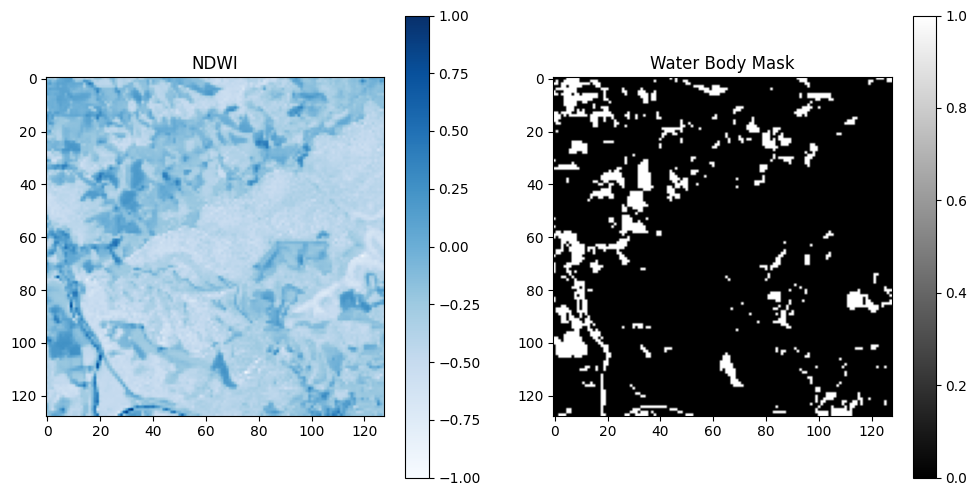

In [20]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
with rasterio.open('data/images/1.tif') as src:
    band2 = src.read(2)  # Blue band
    band3 = src.read(3)  # Green band
    band4 = src.read(4)  # Red band
    band8 = src.read(8)  # NIR band
    band11 = src.read(11)  # SWIR1 band
    band5=src.read(5)

# Normalize the bands
def normalize(band):
    return (band - np.min(band)) / (np.max(band) - np.min(band))

normalized_band2 = normalize(band2)
normalized_band3 = normalize(band3)
normalized_band4 = normalize(band4)
normalized_band8 = normalize(band8)
normalized_band11 = normalize(band11)
normalized_band5 = normalize(band5)


# Calculate NDWI (Normalized Difference Water Index)
ndwi = (normalized_band3 - normalized_band5) / (normalized_band3 + normalized_band5)

# Threshold NDWI to detect water bodies
water_threshold = 0.0  # Adjust based on observations
water_mask = ndwi > water_threshold

# Display NDWI and water mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(ndwi, cmap='Blues')
plt.colorbar()
plt.title('NDWI')

plt.subplot(1, 2, 2)
plt.imshow(water_mask, cmap='gray')
plt.colorbar()
plt.title('Water Body Mask')

plt.show()

Processing data/images\0.tif: NDWI Min: -1.0701754385964912, Max: 0.24324324324324326


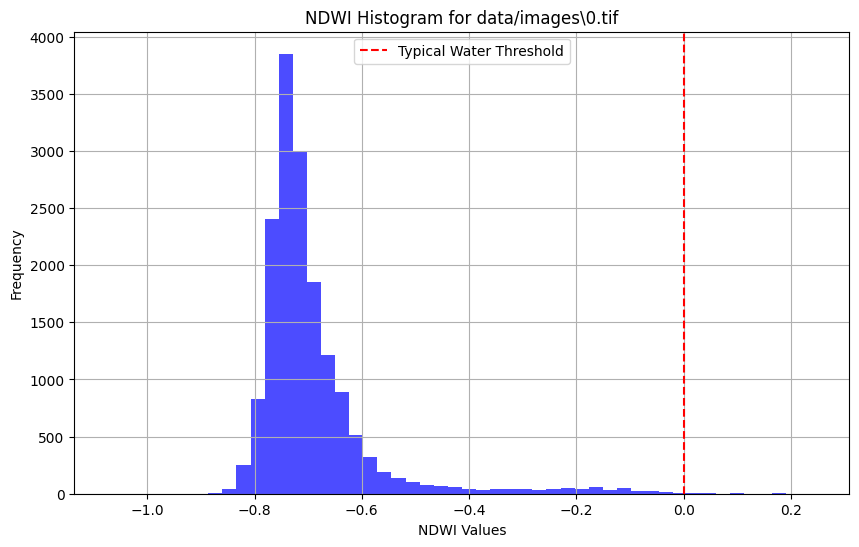

Processing data/images\1.tif: NDWI Min: -0.8831568158524086, Max: -0.302504816955684


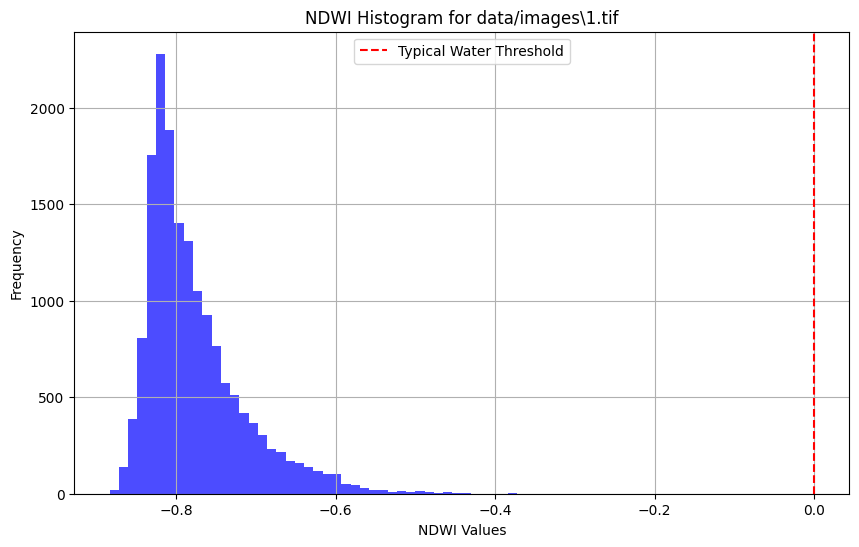

Processing data/images\10.tif: NDWI Min: -171.0, Max: 143.0


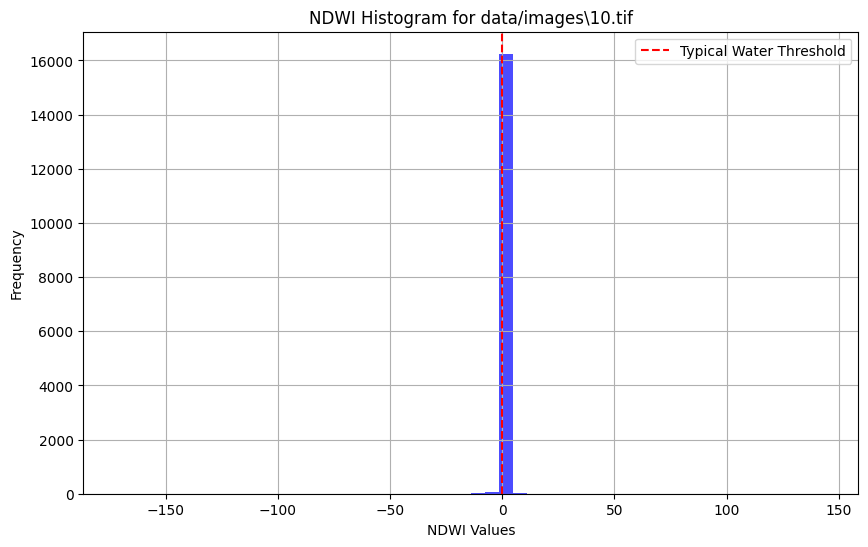

Processing data/images\100.tif: NDWI Min: -0.8881289692232536, Max: 1.0630372492836677


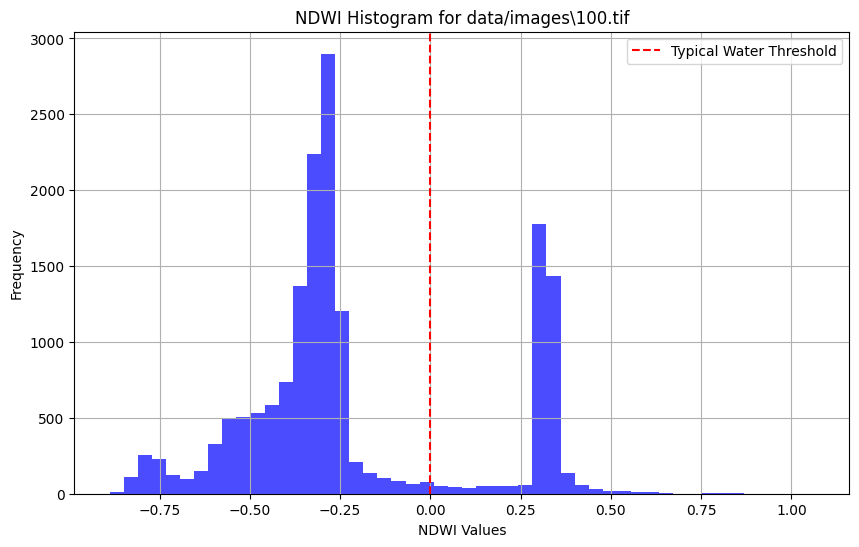

Processing data/images\101.tif: NDWI Min: -0.8291916595258497, Max: -0.33478925529591613


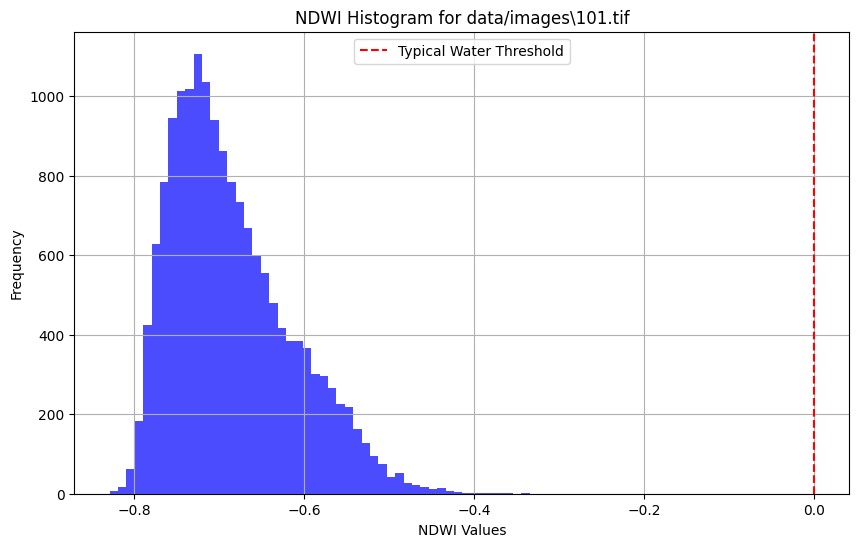

Processing data/images\102.tif: NDWI Min: -0.8559447459299457, Max: 1.1256038647342994


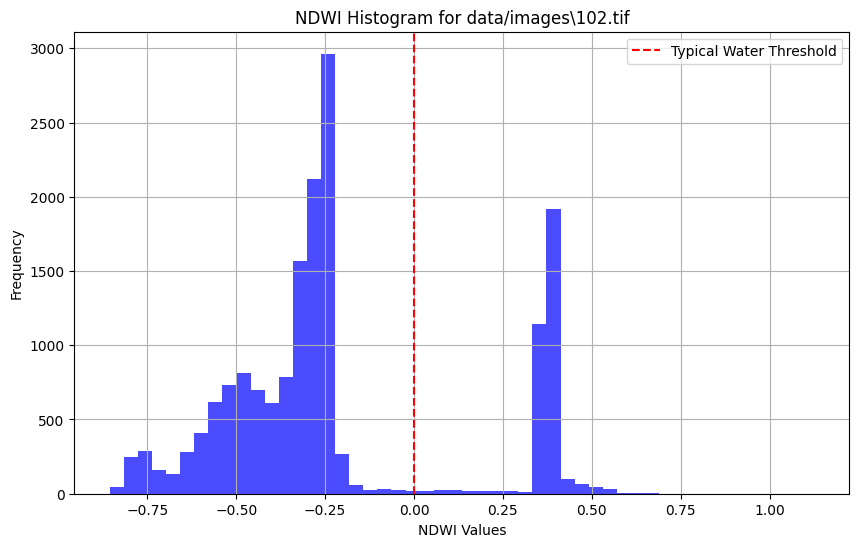

Processing data/images\103.tif: NDWI Min: -0.46801968019680196, Max: -0.34687096178696697


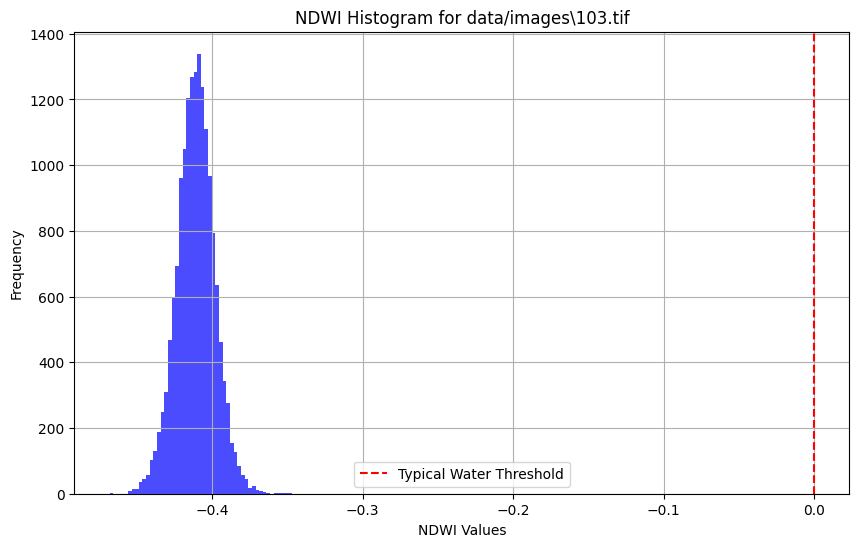

Processing data/images\104.tif: NDWI Min: -0.7843322321849929, Max: 0.012837306785433586


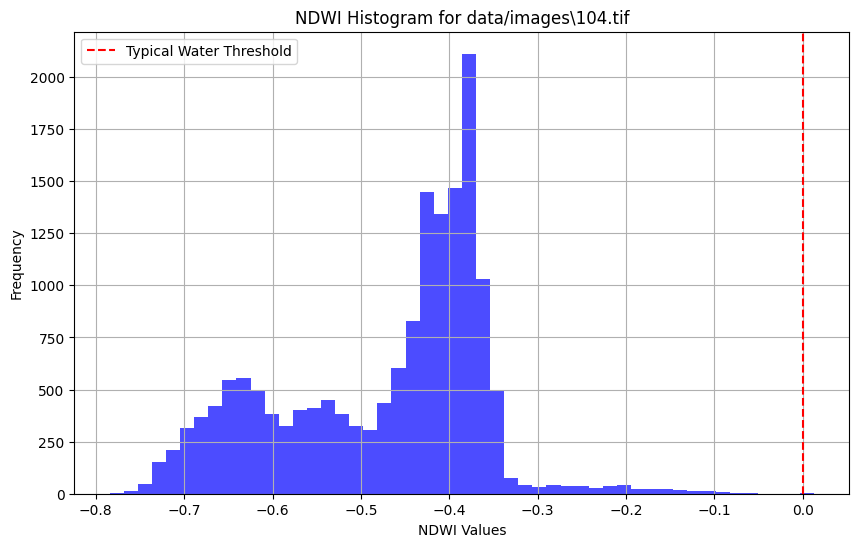

Processing data/images\105.tif: NDWI Min: -0.8896787034404322, Max: -0.1238702817650186


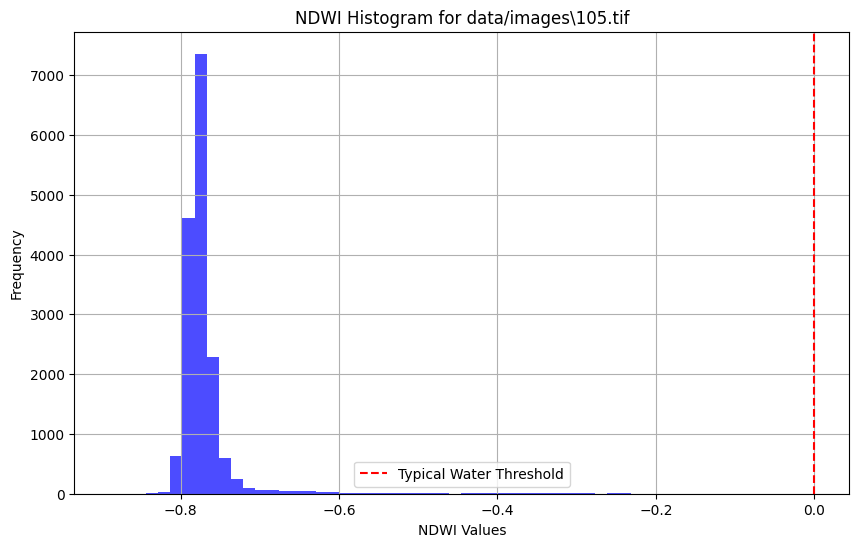

Processing data/images\106.tif: NDWI Min: -0.5462555066079295, Max: -0.4005102040816326


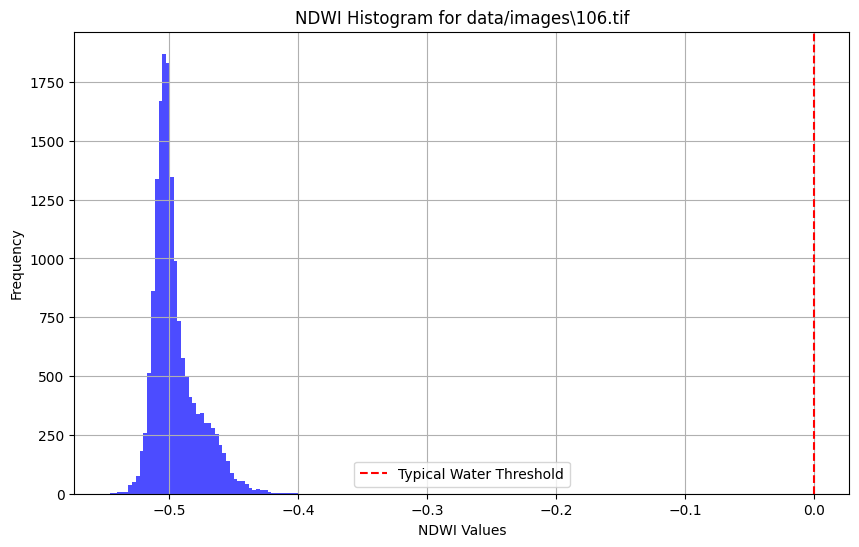

Processing data/images\107.tif: NDWI Min: -0.6893109325541757, Max: 0.07795534951811639


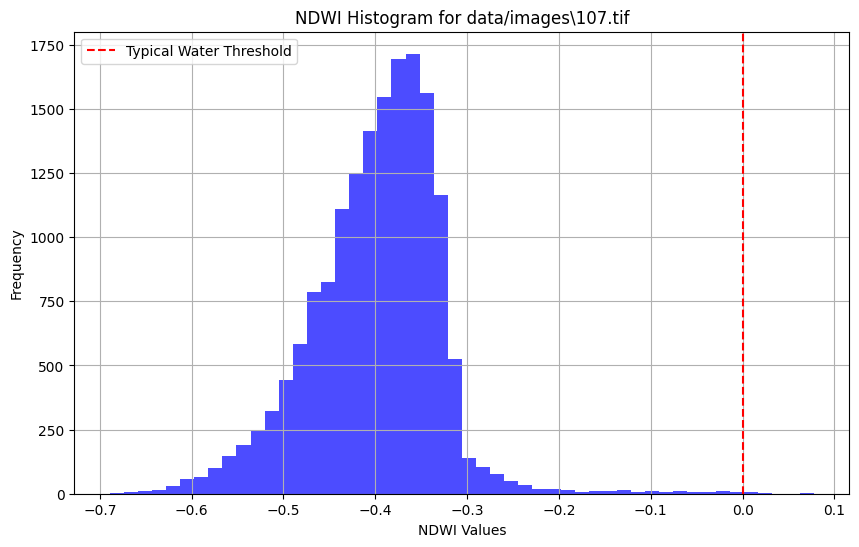

Processing data/images\108.tif: NDWI Min: -0.8107070250734132, Max: 1.1529411764705881


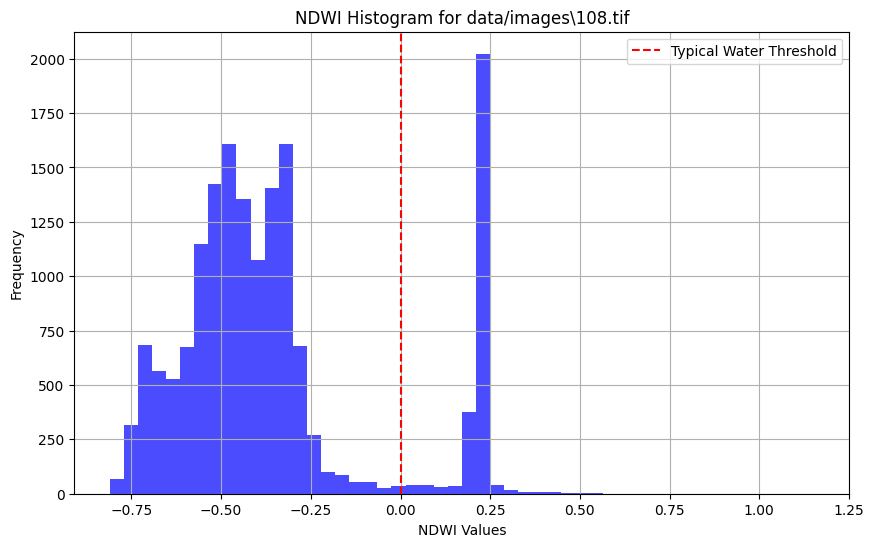

Processing data/images\109.tif: NDWI Min: -0.7816411682892906, Max: 0.0945945945945946


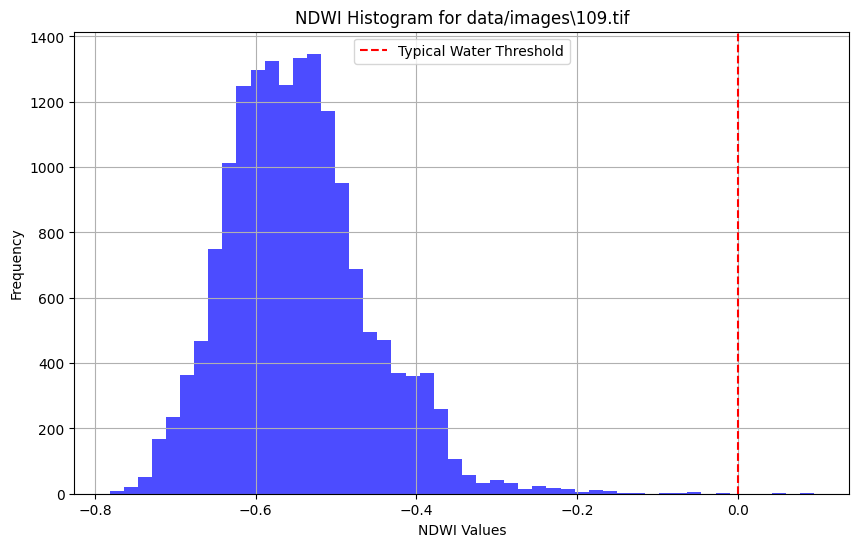

Processing data/images\11.tif: NDWI Min: -0.7069494836728998, Max: 0.12596762843068263


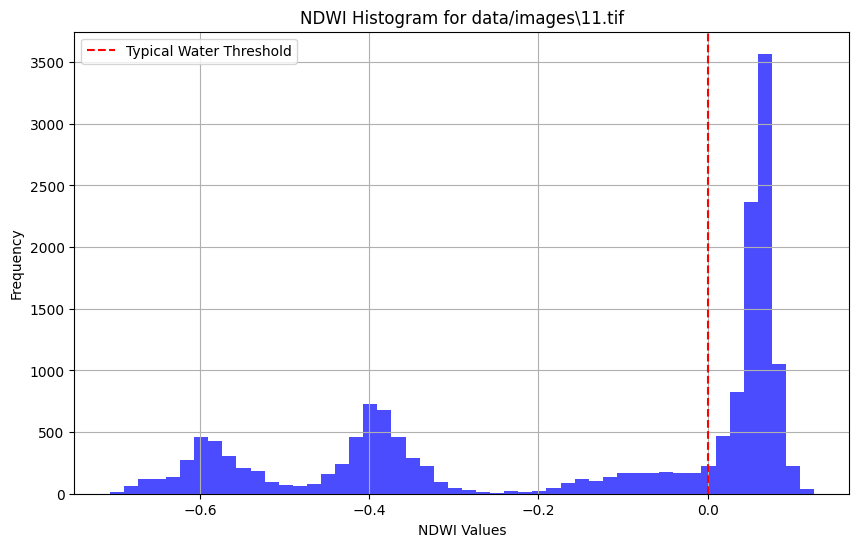

Processing data/images\110.tif: NDWI Min: -99.0, Max: 13.933333333333334


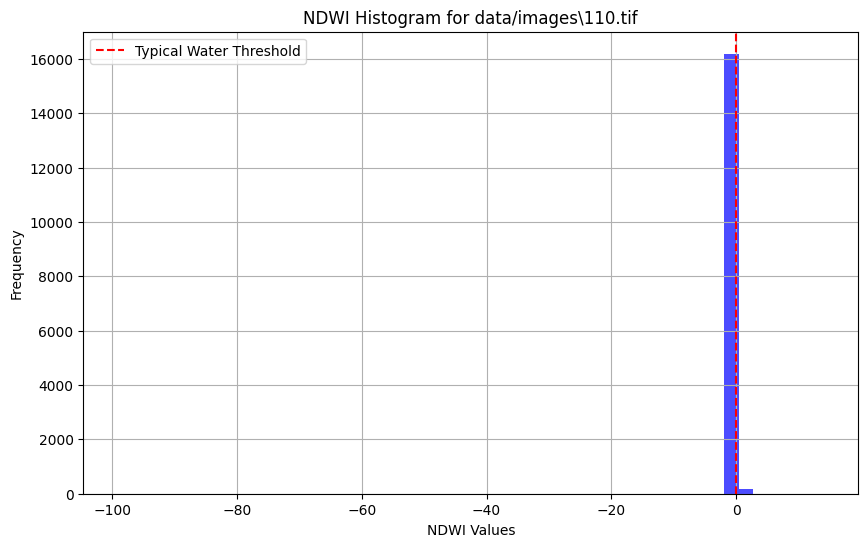

Processing data/images\111.tif: NDWI Min: -0.7837595334230597, Max: 1.7640449438202248


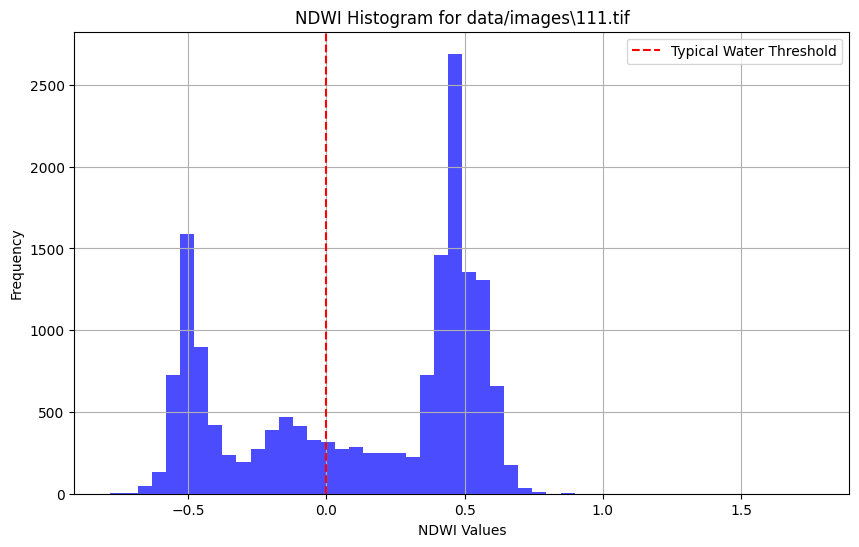

Processing data/images\112.tif: NDWI Min: -0.763506625891947, Max: 0.2970976253298153


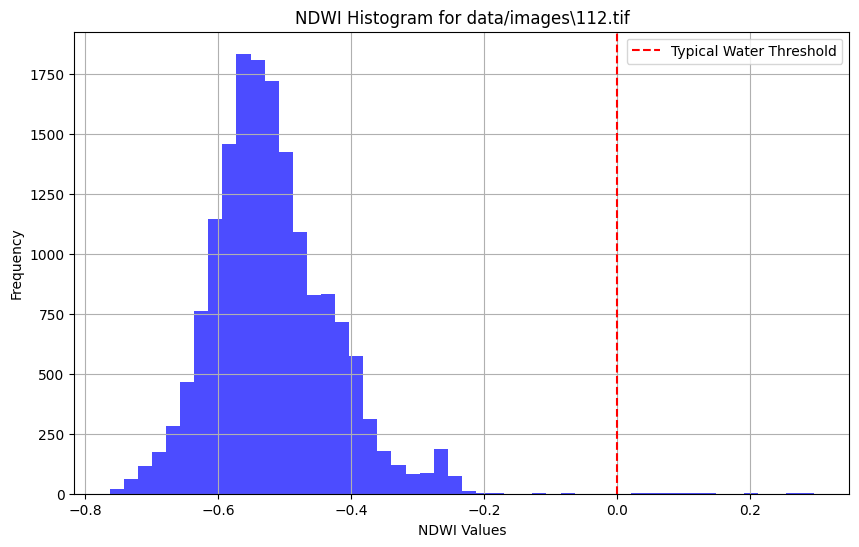

Processing data/images\113.tif: NDWI Min: -79.0, Max: 15.666666666666666


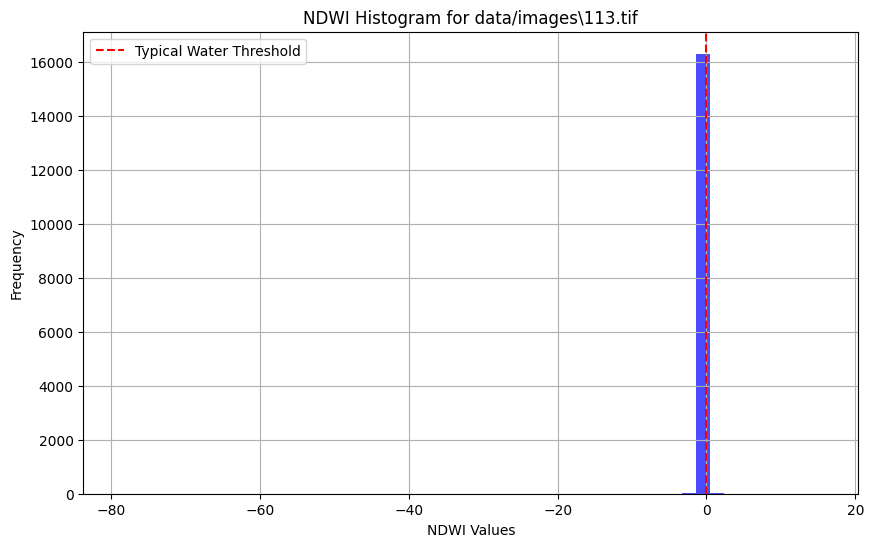

Processing data/images\114.tif: NDWI Min: -0.7061105722599418, Max: 0.24531291259572222


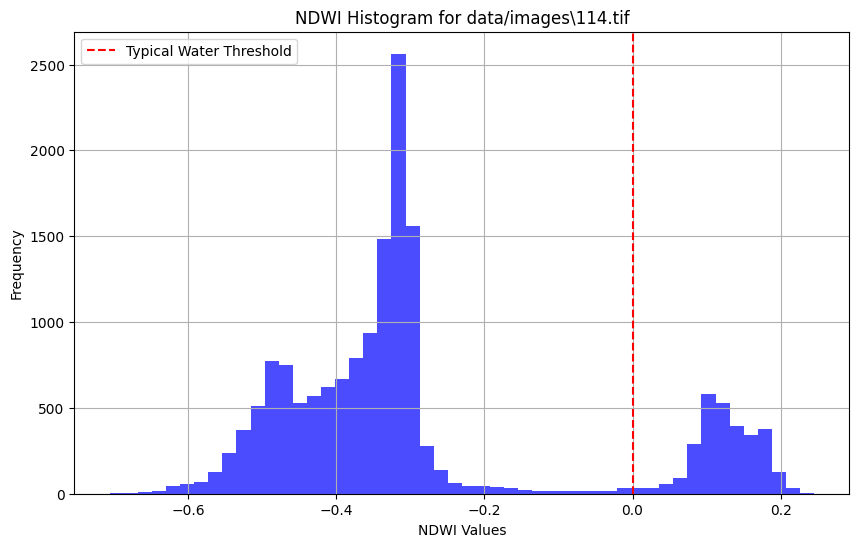

Processing data/images\115.tif: NDWI Min: -0.42429640185251155, Max: -0.1849747474747475


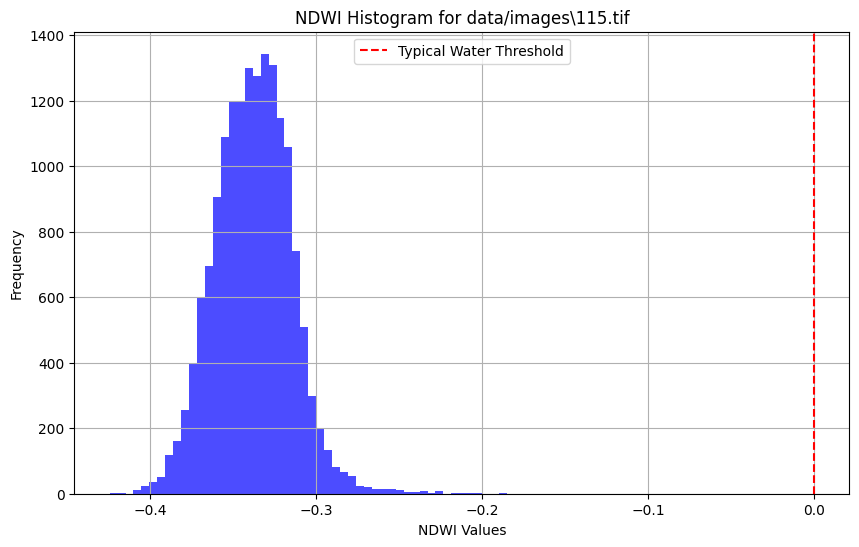

Processing data/images\116.tif: NDWI Min: -0.9601328903654485, Max: 1.8309859154929577


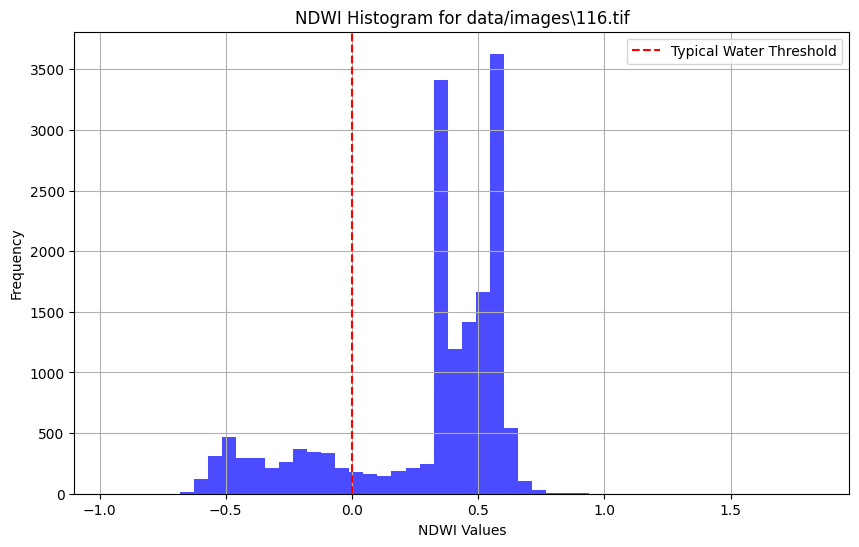

Processing data/images\117.tif: NDWI Min: -7.391304347826087, Max: 98.2


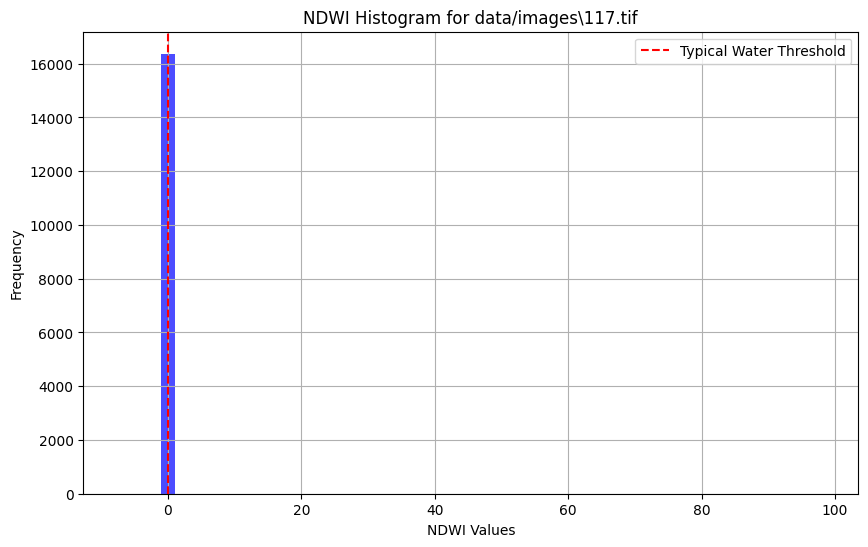

Processing data/images\118.tif: NDWI Min: -1.6566791510611736, Max: 0.9126637554585153


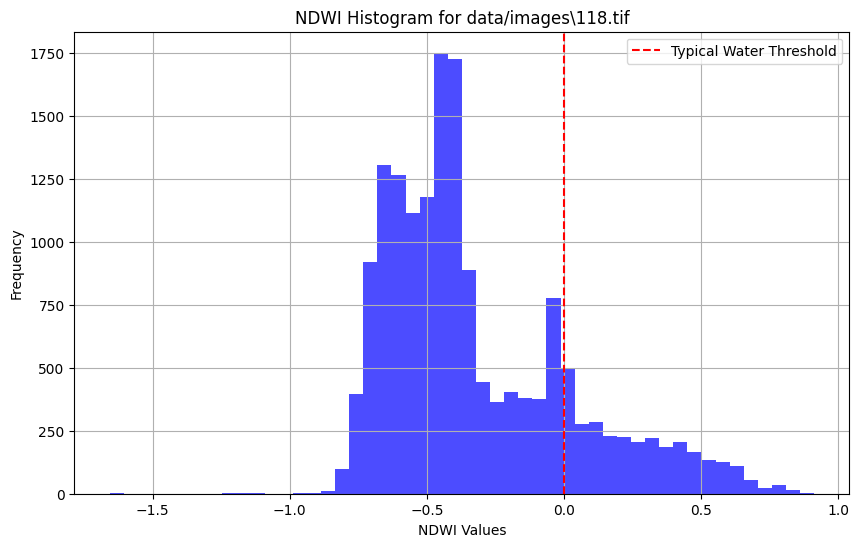

Processing data/images\119.tif: NDWI Min: -0.7258145363408521, Max: 0.24611610793131644


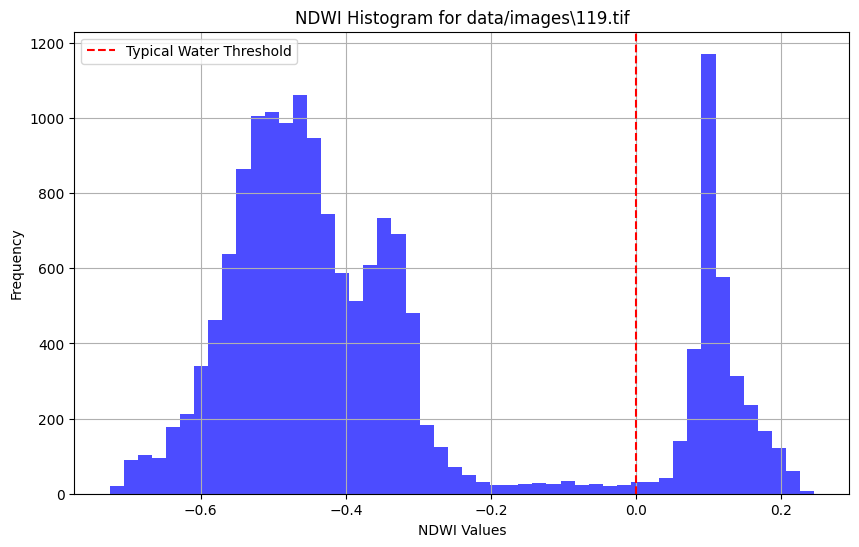

Processing data/images\12.tif: NDWI Min: -0.7957918050941307, Max: 1.1187648456057007


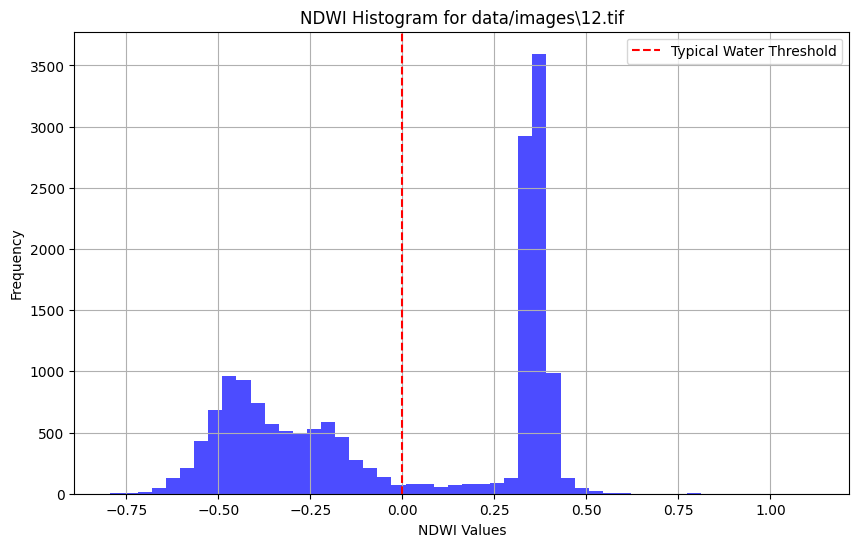

Processing data/images\120.tif: NDWI Min: -0.6349534643226473, Max: 0.56636553161918


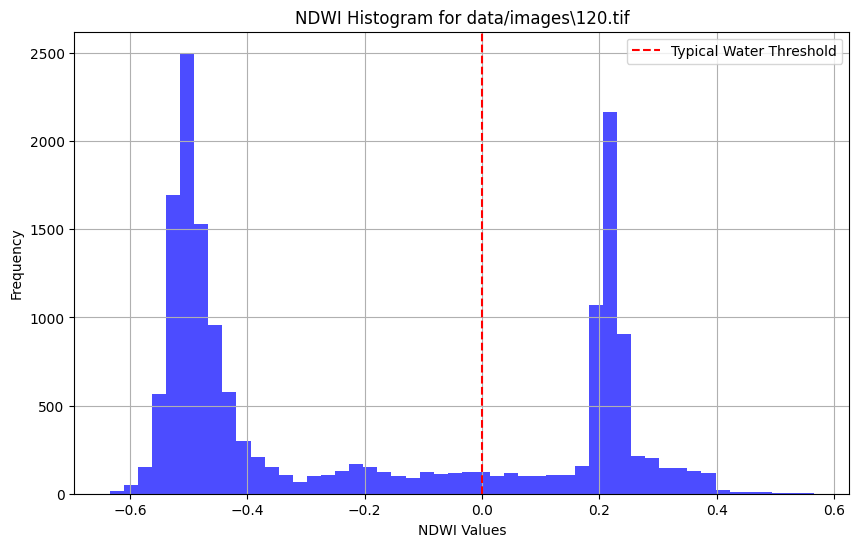

Processing data/images\121.tif: NDWI Min: -0.7709620476610768, Max: 0.3545042125729099


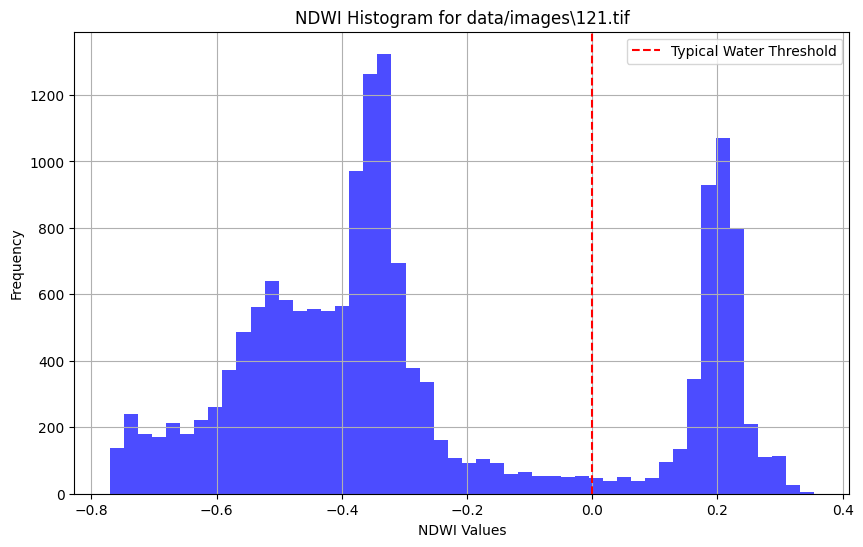

Processing data/images\122.tif: NDWI Min: -0.8914177335229967, Max: -0.3190200935865676


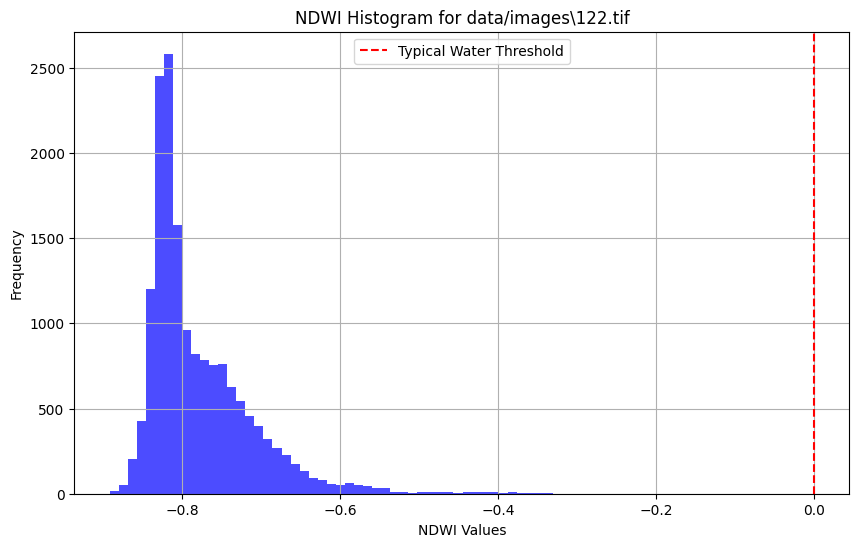

Processing data/images\123.tif: NDWI Min: -0.7542867910307142, Max: 0.060832443970117396


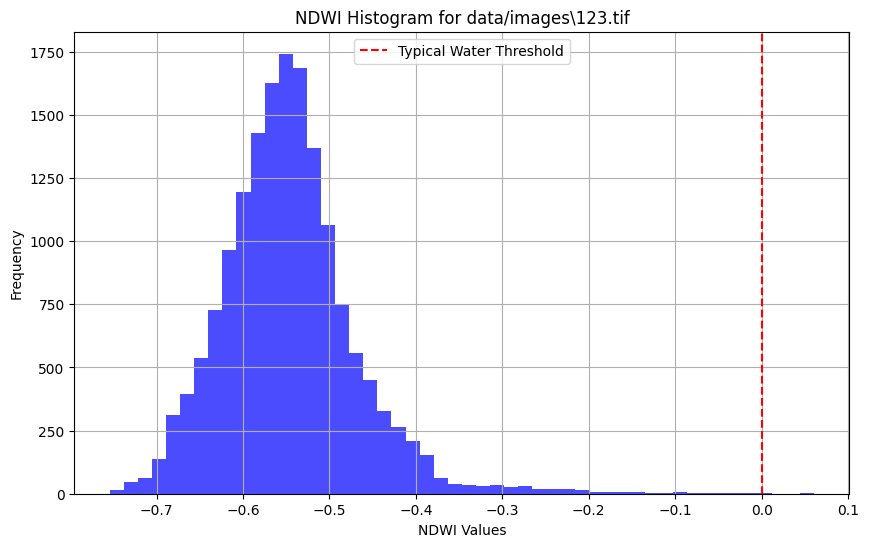

Processing data/images\124.tif: NDWI Min: -0.6883045740892906, Max: 0.5229244114002478


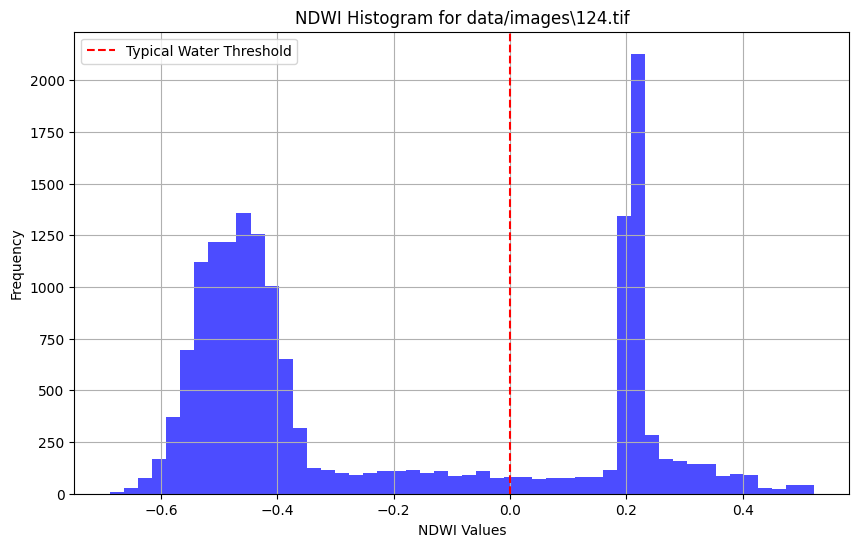

Processing data/images\125.tif: NDWI Min: -8.375, Max: 8.551724137931034


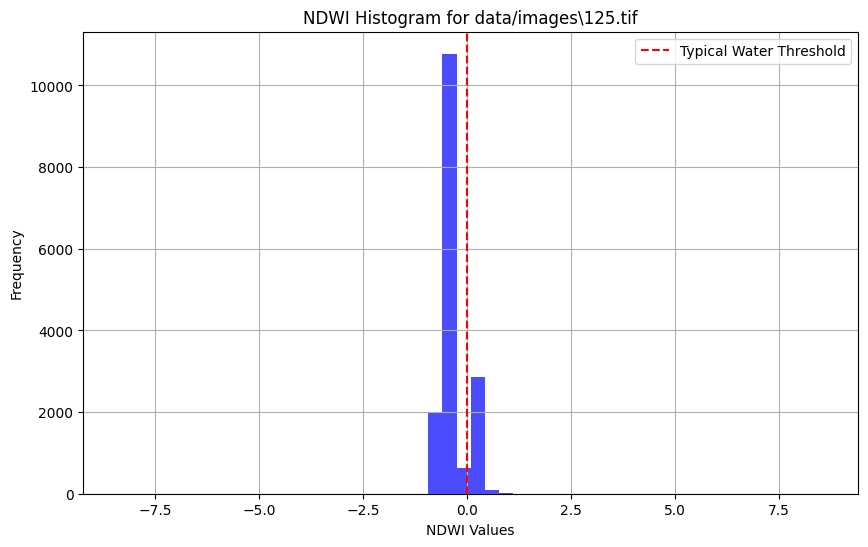

Processing data/images\126.tif: NDWI Min: -0.7815126050420168, Max: 0.8734622144112478


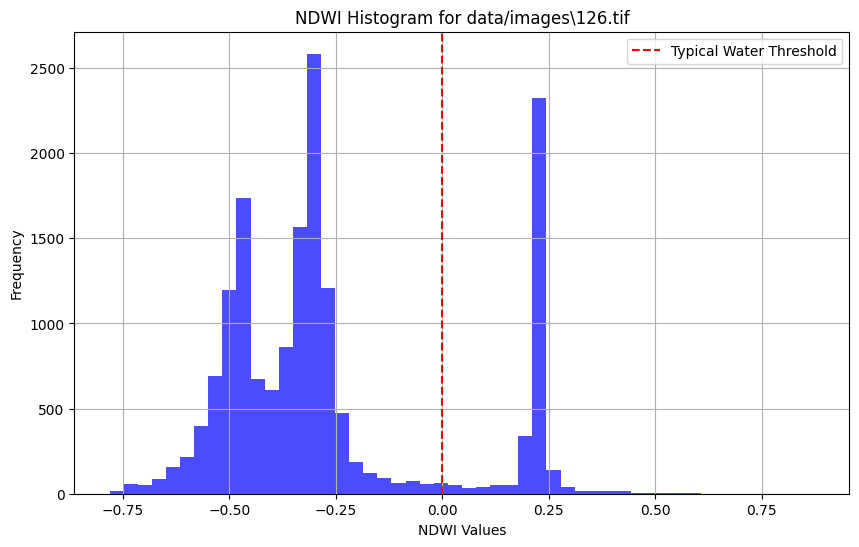

Processing data/images\127.tif: NDWI Min: -33.72727272727273, Max: 3.7708333333333335


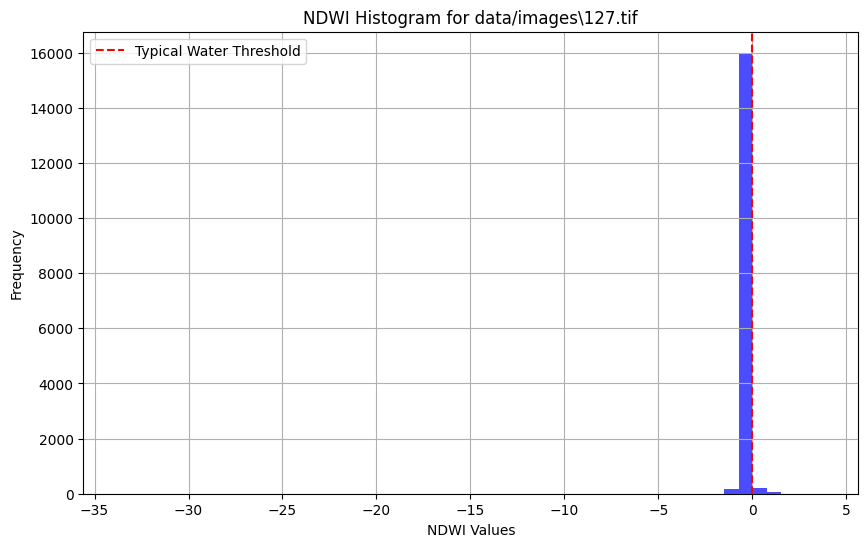

Processing data/images\128.tif: NDWI Min: -0.7681962025316456, Max: 0.4945904173106646


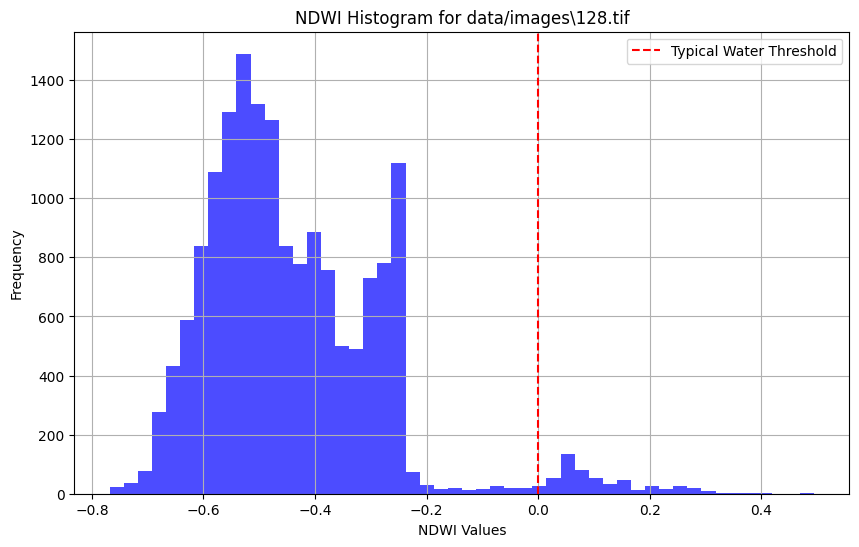

Processing data/images\129.tif: NDWI Min: -0.8882497945768283, Max: 0.41827541827541825


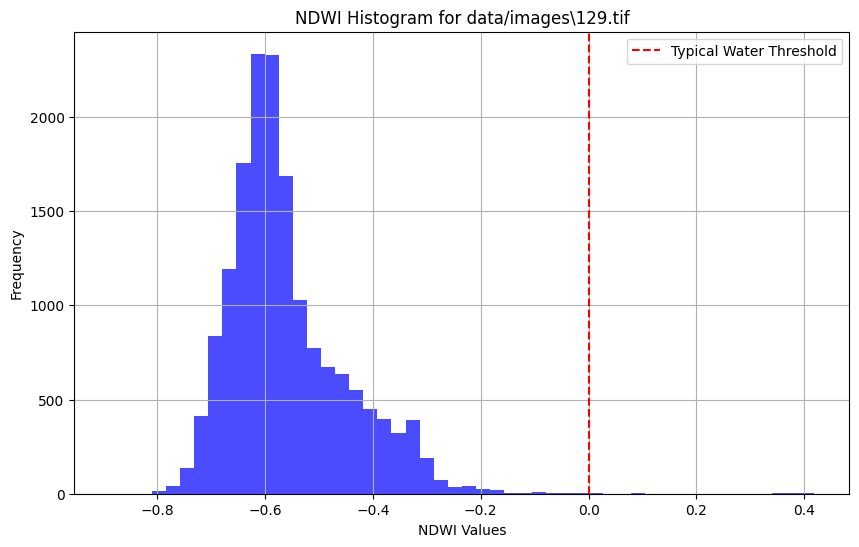

Processing data/images\13.tif: NDWI Min: -1.8848484848484848, Max: 0.3577981651376147


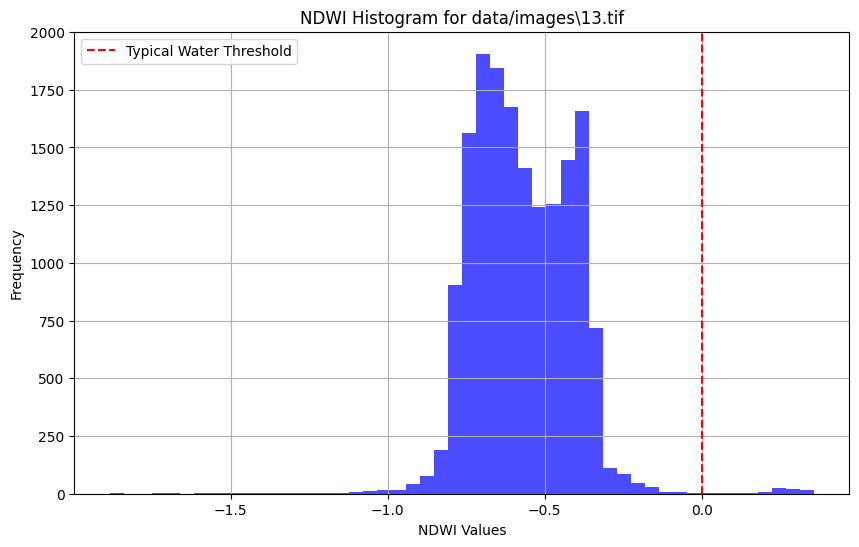

Processing data/images\130.tif: NDWI Min: -0.8559447459299457, Max: 0.7386934673366834


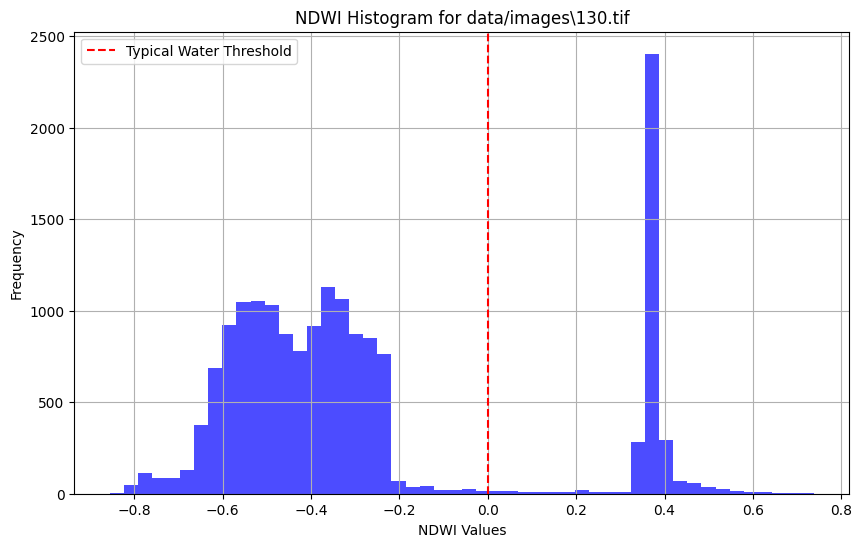

Processing data/images\131.tif: NDWI Min: -0.7961840628507295, Max: 0.7622950819672131


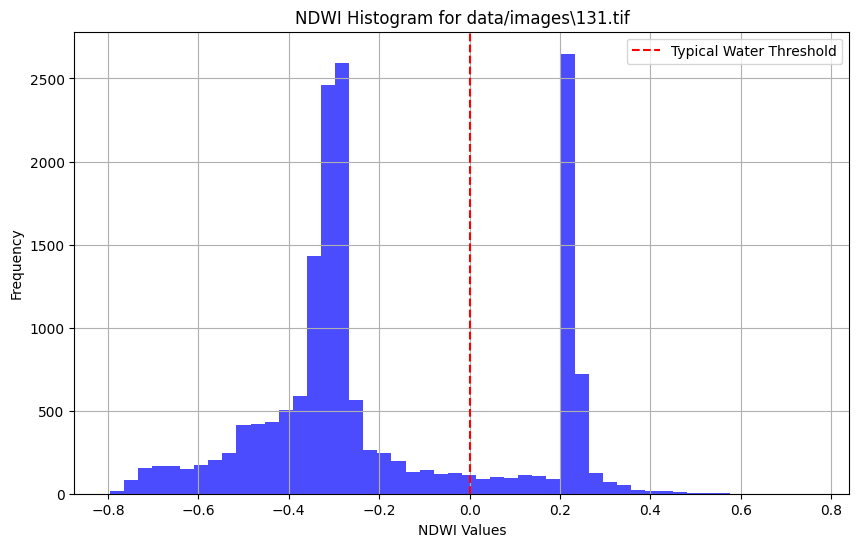

Processing data/images\132.tif: NDWI Min: -0.7476248477466504, Max: 0.697560975609756


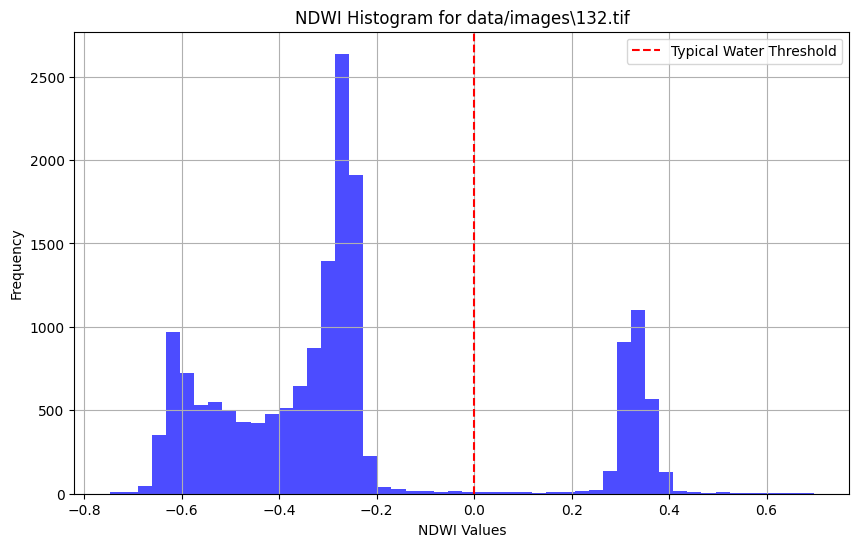

Processing data/images\133.tif: NDWI Min: -0.6399474375821288, Max: -0.31456879081288


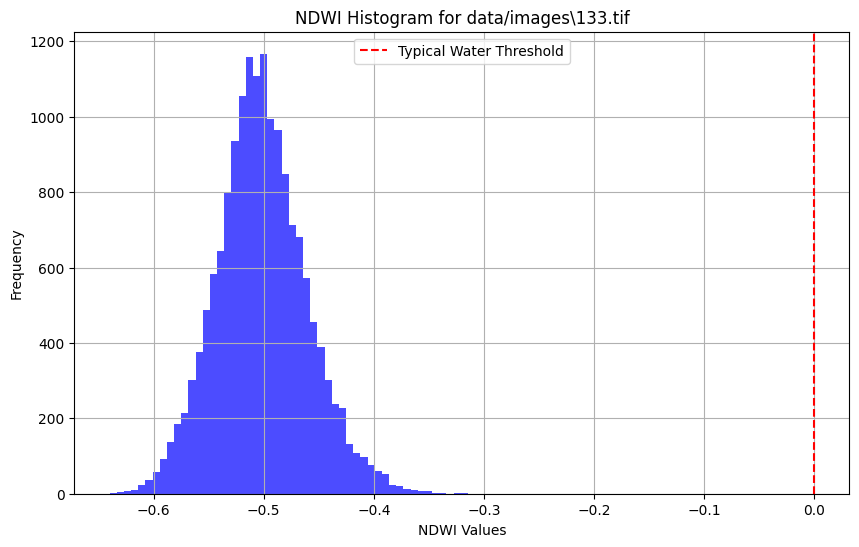

Processing data/images\134.tif: NDWI Min: -0.8023402340234024, Max: 1.397489539748954


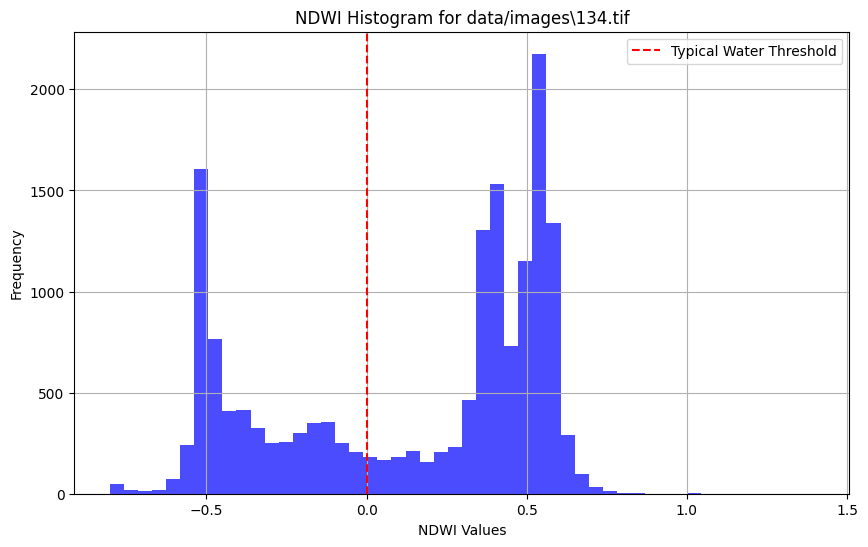

Processing data/images\135.tif: NDWI Min: -0.6925579503863359, Max: 0.6402214022140221


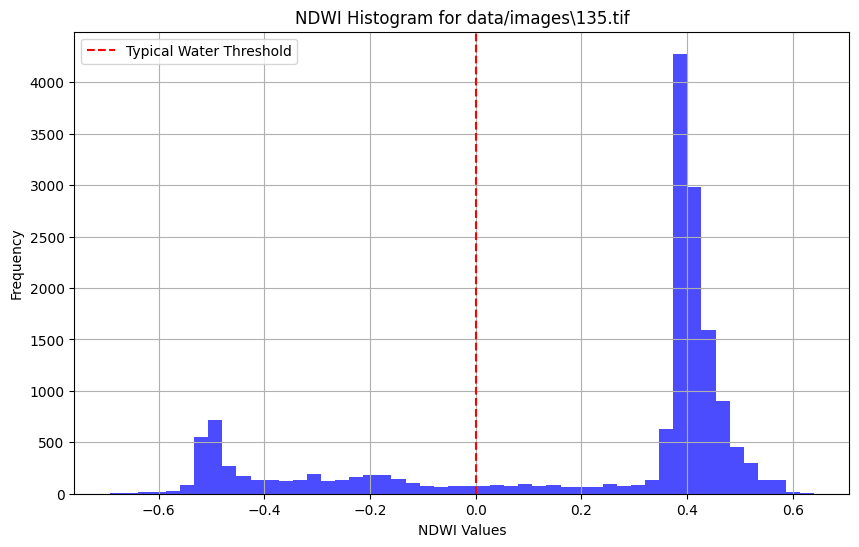

Processing data/images\136.tif: NDWI Min: -0.7206905436743107, Max: -0.03235470341521869


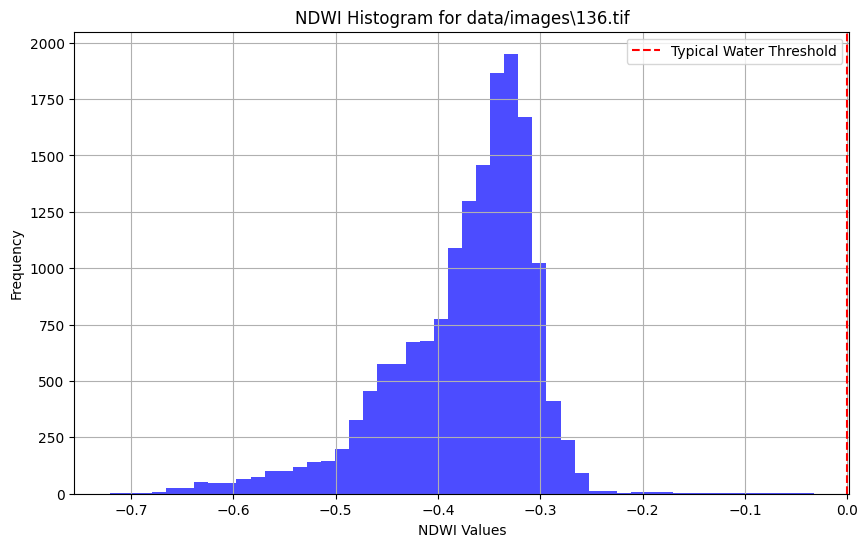

Processing data/images\137.tif: NDWI Min: -5.92436974789916, Max: 4.45


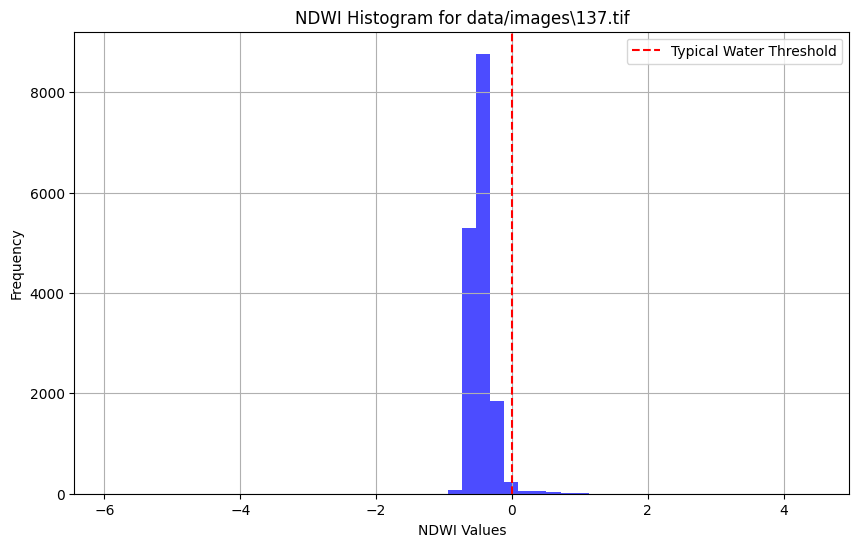

C:\Users\elbostan\AppData\Local\Temp\ipykernel_5552\2543680838.py:19: RuntimeWarning: divide by zero encountered in divide
  ndwi = (band3 - band5) / (band3 + band5)


Processing data/images\138.tif: NDWI Min: -8.066666666666666, Max: inf


ValueError: supplied range of [-8.066666666666666, inf] is not finite

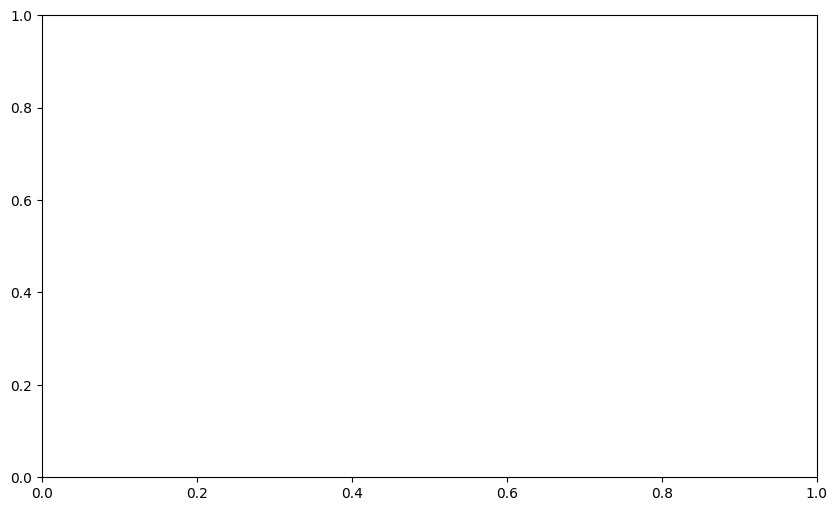

In [21]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import glob

# Define the directory containing the Sentinel-2 images
image_directory = 'data/images/*.tif'  # Update this path as necessary

# Get a list of all image file paths
image_files = glob.glob(image_directory)

# Loop over each image file
for image_file in image_files:
    with rasterio.open(image_file) as src:
        band3 = src.read(3)  # Green band
        band5 = src.read(5)  # NIR band

    # Calculate NDWI
    ndwi = (band3 - band5) / (band3 + band5)

    # Inspect NDWI values
    print(f"Processing {image_file}: NDWI Min: {np.min(ndwi)}, Max: {np.max(ndwi)}")

    # Visualize NDWI histogram
    plt.figure(figsize=(10, 6))
    plt.hist(ndwi.flatten(), bins=50, color='blue', alpha=0.7)
    plt.xlabel('NDWI Values')
    plt.ylabel('Frequency')
    plt.title(f'NDWI Histogram for {image_file}')
    plt.grid()
    plt.axvline(x=0.0, color='red', linestyle='--', label='Typical Water Threshold')
    plt.legend()
    plt.show()

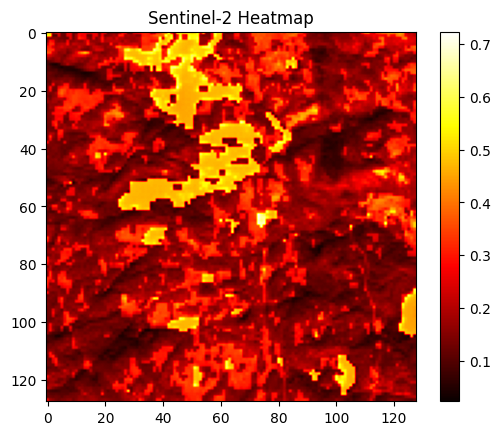

In [34]:
##The modified normalized water index (MNDWI) Green+SWIR
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
with rasterio.open('data/images/0.tif') as src:
    band2 = src.read(2)  # Blue band
    band3 = src.read(3)  # Green band
    band4 = src.read(4)  # Red band
    band8 = src.read(8)  # NIR band   -->detect Water
    band11 = src.read(11)  # SWIR1 band --. Detect water 


# Normalize the data
normalized_band4 = (band4 - np.min(band4)) / (np.max(band4) - np.min(band4))
normalized_band3 = (band3 - np.min(band3)) / (np.max(band3) - np.min(band3))
normalized_band2 = (band2 - np.min(band2)) / (np.max(band2) - np.min(band2))
normalized_band8 = (band8 - np.min(band8)) / (np.max(band8) - np.min(band8))
normalized_band11 = (band11 - np.min(band11)) / (np.max(band11) - np.min(band11))

# Create heatmap
heatmap = (normalized_band3+normalized_band11) / 2

# Display the heatmap
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.title('Sentinel-2 Heatmap')
plt.show()

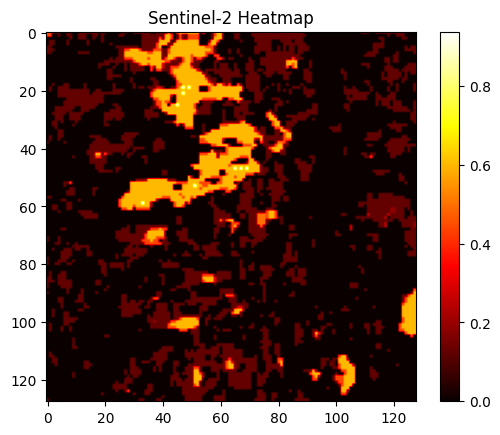

In [29]:
##NDWI NIR+SWIR
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
with rasterio.open('data/images/0.tif') as src:
    band2 = src.read(2)  # Blue band
    band3 = src.read(3)  # Green band
    band4 = src.read(4)  # Red band
    band8 = src.read(8)  # NIR band   -->detect Water
    band11 = src.read(11)  # SWIR1 band --. Detect water 


# Normalize the data
normalized_band4 = (band4 - np.min(band4)) / (np.max(band4) - np.min(band4))
normalized_band3 = (band3 - np.min(band3)) / (np.max(band3) - np.min(band3))
normalized_band2 = (band2 - np.min(band2)) / (np.max(band2) - np.min(band2))
normalized_band8 = (band8 - np.min(band8)) / (np.max(band8) - np.min(band8))
normalized_band11 = (band11 - np.min(band11)) / (np.max(band11) - np.min(band11))

# Create heatmap
heatmap = (normalized_band8+normalized_band11) / 2

# Display the heatmap
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.title('Sentinel-2 Heatmap')
plt.show()

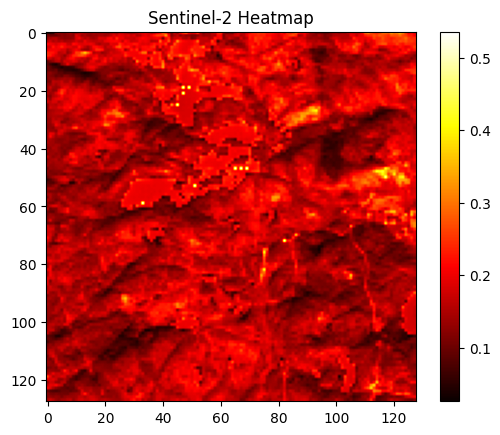

In [33]:
##NDWI NIR+Green
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
with rasterio.open('data/images/0.tif') as src:
    band2 = src.read(2)  # Blue band
    band3 = src.read(3)  # Green band
    band4 = src.read(4)  # Red band
    band8 = src.read(8)  # NIR band   -->detect Water
    band11 = src.read(11)  # SWIR1 band --. Detect water 


# Normalize the data
normalized_band4 = (band4 - np.min(band4)) / (np.max(band4) - np.min(band4))
normalized_band3 = (band3 - np.min(band3)) / (np.max(band3) - np.min(band3))
normalized_band2 = (band2 - np.min(band2)) / (np.max(band2) - np.min(band2))
normalized_band8 = (band8 - np.min(band8)) / (np.max(band8) - np.min(band8))
normalized_band11 = (band11 - np.min(band11)) / (np.max(band11) - np.min(band11))

# Create heatmap
heatmap = (normalized_band3+normalized_band8) / 2

# Display the heatmap
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.title('Sentinel-2 Heatmap')
plt.show()